🧩 Cell 1: Imports

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import (
    VarianceThreshold,
    SelectKBest,
    chi2,
    mutual_info_classif,
    RFE
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# For nicer plots
sns.set(style="whitegrid")


🧩 Cell 2: Load the Breast Cancer Dataset

In [15]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset from sklearn
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


🧩 Cell 3: Basic Info

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [17]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [18]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

🧩 Cell 4: Separate Features and Target

In [19]:
X = df.drop('target', axis=1)
y = df['target']

X.shape, y.shape

((569, 30), (569,))

8️⃣ Feature Selection Methods

1.Filter Methods

VarianceThreshold

Correlation with target

Chi²

Mutual Information

2.Wrapper Method

RFE (Recursive Feature Elimination)

3.Embedded Methods

L1 (Lasso-style Logistic Regression)

Random Forest feature importance

Again: these will fit models internally just to compute importance, but we won’t build a full predictive model or evaluate accuracy.

🔹 8.1 Filter Method – Variance Threshold

In [20]:
selector_var = VarianceThreshold(threshold=0.0)  # remove zero-variance features
selector_var.fit(X)

var_support = selector_var.get_support()
low_variance_features = X.columns[~var_support]

print("Number of features:", X.shape[1])
print("Number of features removed (zero variance):", len(low_variance_features))
print("Zero-variance features:", list(low_variance_features))


Number of features: 30
Number of features removed (zero variance): 0
Zero-variance features: []


🔹 8.2 Filter Method – Correlation with Target

In [21]:
# Make a copy with target
df_corr = df.copy()

corr_with_target = df_corr.corr()['target'].drop('target').sort_values(ascending=False)
corr_with_target.head(15)


smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
Name: target, dtype: float64

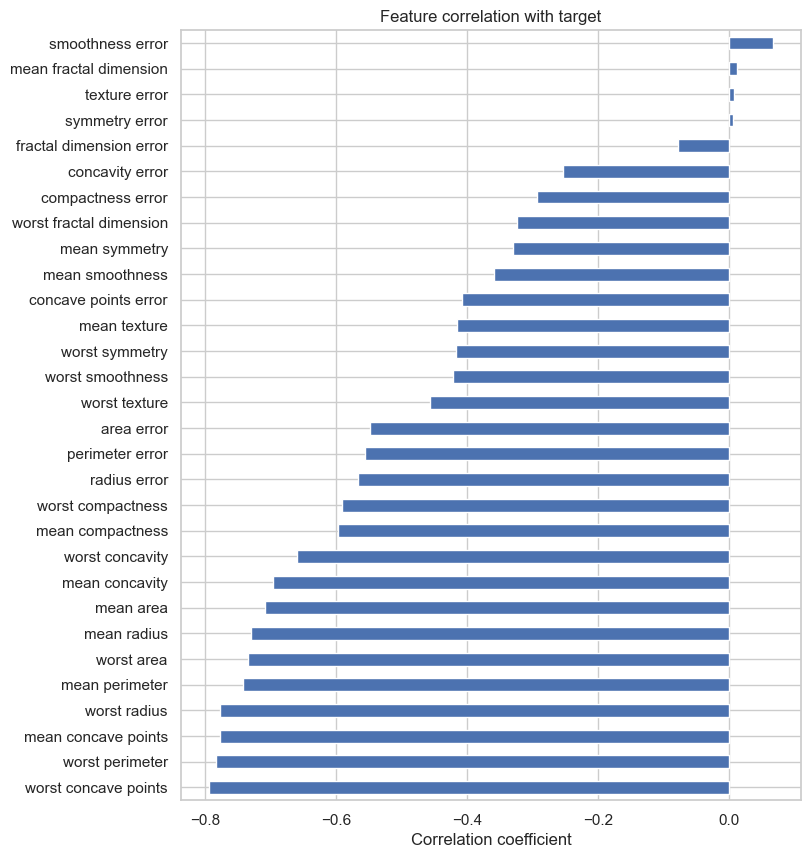

In [22]:
plt.figure(figsize=(8, 10))
corr_with_target.sort_values().plot(kind='barh')
plt.title("Feature correlation with target")
plt.xlabel("Correlation coefficient")
plt.show()


🔹 8.3 Filter Method – Chi-Square Test

In [23]:
k = 10  # select top 10 features

chi2_selector = SelectKBest(score_func=chi2, k=k)
chi2_selector.fit(X, y)

chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns)
chi2_scores.sort_values(ascending=False).head(15)


worst area              112598.431564
mean area                53991.655924
area error                8758.504705
worst perimeter           3665.035416
mean perimeter            2011.102864
worst radius               491.689157
mean radius                266.104917
perimeter error            250.571896
worst texture              174.449400
mean texture                93.897508
worst concavity             39.516915
radius error                34.675247
mean concavity              19.712354
worst compactness           19.314922
worst concave points        13.485419
dtype: float64

In [24]:
chi2_selected_features = chi2_scores.sort_values(ascending=False).head(k).index
print("Top", k, "features by Chi-square:")
print(list(chi2_selected_features))

Top 10 features by Chi-square:
['worst area', 'mean area', 'area error', 'worst perimeter', 'mean perimeter', 'worst radius', 'mean radius', 'perimeter error', 'worst texture', 'mean texture']


🔹 8.4 Filter Method – Mutual Information

In [25]:
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores.sort_values(ascending=False).head(15)


worst perimeter         0.471842
worst area              0.464313
worst radius            0.451230
mean concave points     0.438806
worst concave points    0.436255
mean perimeter          0.402361
mean concavity          0.375447
mean radius             0.362276
mean area               0.360023
area error              0.340759
worst concavity         0.315259
perimeter error         0.275614
radius error            0.249301
worst compactness       0.225211
mean compactness        0.213439
dtype: float64

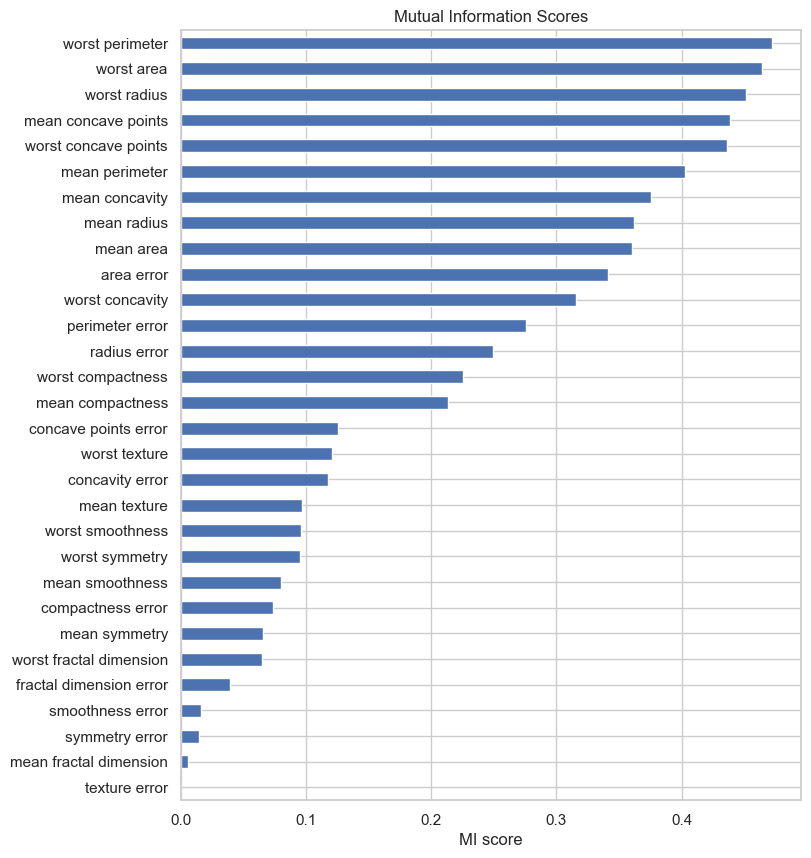

In [26]:
plt.figure(figsize=(8, 10))
mi_scores.sort_values().plot(kind='barh')
plt.title("Mutual Information Scores")
plt.xlabel("MI score")
plt.show()


9️⃣ Wrapper Method – RFE (Recursive Feature Elimination)

In [27]:
log_reg = LogisticRegression(max_iter=5000, solver='liblinear')

n_features_to_select = 10

rfe = RFE(estimator=log_reg, n_features_to_select=n_features_to_select)
rfe.fit(X, y)

rfe_support = rfe.get_support()
rfe_rank = rfe.ranking_

rfe_selected_features = X.columns[rfe_support]

print("RFE selected features (top 10):")
print(list(rfe_selected_features))


RFE selected features (top 10):
['mean radius', 'mean concavity', 'mean concave points', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst compactness', 'worst concavity', 'worst concave points']


In [28]:
rfe_ranking_df = pd.DataFrame({
    'feature': X.columns,
    'rank': rfe_rank
}).sort_values('rank')

rfe_ranking_df.head(15)

,feature,rank
0,mean radius,1
7,mean concave points,1
6,mean concavity,1
13,area error,1
12,perimeter error,1
26,worst concavity,1
20,worst radius,1
22,worst perimeter,1
25,worst compactness,1
27,worst concave points,1


🔟 Embedded Method – L1-Regularized Logistic Regression

In [29]:
log_reg_l1 = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    max_iter=5000
)

log_reg_l1.fit(X, y)

coef = pd.Series(log_reg_l1.coef_[0], index=X.columns)
non_zero_features = coef[coef != 0].sort_values(key=lambda x: abs(x), ascending=False)

print("Number of non-zero coefficient features:", len(non_zero_features))
non_zero_features.head(15)

D:\ML_foundations\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
D:\ML_foundations\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


Number of non-zero coefficient features: 10


mean radius        4.588042
worst concavity   -3.489138
texture error      1.415297
worst texture     -0.358466
mean perimeter    -0.260845
mean texture       0.101248
area error        -0.096518
worst perimeter   -0.075506
mean area         -0.016554
worst area        -0.015101
dtype: float64

1️⃣1️⃣ Embedded Method – Random Forest Feature Importance

In [30]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X, y)

rf_importance = pd.Series(rf.feature_importances_, index=X.columns)
rf_importance.sort_values(ascending=False).head(15)

worst perimeter         0.143298
worst area              0.128118
worst concave points    0.119072
mean concave points     0.102228
worst radius            0.076250
mean area               0.053145
mean perimeter          0.053057
mean concavity          0.052886
mean radius             0.042239
worst concavity         0.037786
area error              0.032840
worst compactness       0.016750
worst texture           0.016418
mean texture            0.014548
mean compactness        0.013842
dtype: float64

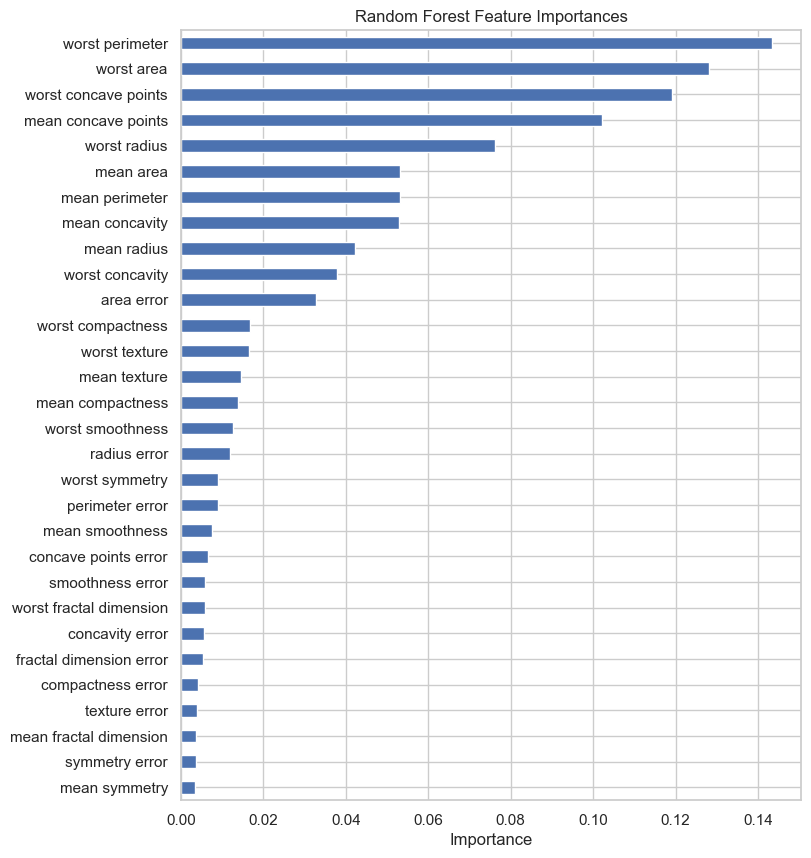

In [31]:
plt.figure(figsize=(8, 10))
rf_importance.sort_values().plot(kind='barh')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.show()

1️⃣2️⃣ Compare Features Selected by Different Methods

In [32]:
top_k = 10

# From previous results:
chi2_top = set(chi2_selected_features)
mi_top = set(mi_scores.sort_values(ascending=False).head(top_k).index)
rfe_top = set(rfe_selected_features)
rf_top = set(rf_importance.sort_values(ascending=False).head(top_k).index)

print("Chi2 top features:", chi2_top)
print("MI top features:", mi_top)
print("RFE top features:", rfe_top)
print("RF top features:", rf_top)

common_features = chi2_top & mi_top & rfe_top & rf_top
print("\nFeatures common to ALL methods:", common_features)


Chi2 top features: {'worst perimeter', 'worst texture', 'mean area', 'area error', 'worst radius', 'mean radius', 'mean perimeter', 'perimeter error', 'mean texture', 'worst area'}
MI top features: {'worst perimeter', 'mean area', 'area error', 'worst radius', 'mean concavity', 'mean radius', 'mean perimeter', 'mean concave points', 'worst concave points', 'worst area'}
RFE top features: {'worst perimeter', 'worst compactness', 'area error', 'mean concavity', 'worst radius', 'worst concavity', 'mean radius', 'perimeter error', 'mean concave points', 'worst concave points'}
RF top features: {'worst perimeter', 'mean area', 'worst radius', 'mean concavity', 'worst concavity', 'mean radius', 'mean perimeter', 'mean concave points', 'worst concave points', 'worst area'}

Features common to ALL methods: {'worst perimeter', 'mean radius', 'worst radius'}


1️⃣3️⃣  Save Selected Features Summary

In [33]:
summary = pd.DataFrame(index=X.columns)
summary['chi2_top10'] = summary.index.isin(chi2_top)
summary['mi_top10'] = summary.index.isin(mi_top)
summary['rfe_top10'] = summary.index.isin(rfe_top)
summary['rf_top10'] = summary.index.isin(rf_top)

summary.to_csv("../data/feature_selection_summary.csv")
summary.head(20)


,chi2_top10,mi_top10,rfe_top10,rf_top10
mean radius,True,True,True,True
mean texture,True,False,False,False
mean perimeter,True,True,False,True
mean area,True,True,False,True
mean smoothness,False,False,False,False
mean compactness,False,False,False,False
mean concavity,False,True,True,True
mean concave points,False,True,True,True
mean symmetry,False,False,False,False
mean fractal dimension,False,False,False,False
